In [1]:
def limpieza(dataset):
    
    df = dataset.copy()

    df.rename(columns={'default payment next month':'default'}, inplace=True)

    df.drop(columns='ID', inplace=True)

    df = df[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

    df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x > 4 else x)

    df['SEX'] = df['SEX'].astype('category')
    df['EDUCATION'] = df['EDUCATION'].astype('category')
    df['MARRIAGE'] = df['MARRIAGE'].astype('category')
    df['PAY_0'] = df['PAY_0'].astype('category')
    df['PAY_2'] = df['PAY_2'].astype('category')
    df['PAY_3'] = df['PAY_3'].astype('category')
    df['PAY_4'] = df['PAY_4'].astype('category')
    df['PAY_5'] = df['PAY_5'].astype('category')
    df['PAY_6'] = df['PAY_6'].astype('category')
    df['default'] = df['default'].astype('category')

    return df

In [2]:
import glob
import pandas as pd

test_file, train_file = glob.glob(f'../files/input/*')

def load_data(directory):
    df = pd.read_csv(directory)
    df = limpieza(dataset=df)
    return df

test = load_data(directory=test_file)
train = load_data(directory=train_file)

In [3]:
def division_dataset(dataset):

    df = dataset.copy()
    x  = df.drop(columns='default')
    y  = df['default']

    return x, y

x_train, y_train = division_dataset(train)
x_test, y_test = division_dataset(test)

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.svm import SVC

In [5]:
categorical_columns = x_train.select_dtypes(include='category').columns.to_list()

column_transformer = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(drop='if_binary', max_categories=6, handle_unknown='infrequent_if_exist', sparse_output=False), categorical_columns)
    ],
    remainder=StandardScaler() 
)

pipe = Pipeline(steps=
    [
        ('preprocessor', column_transformer),
        ('dimensionality_reducter', PCA(n_components=2)),
        ('classifier', SVC())
    ]
)

pipe.fit(x_train, y_train)

c:\Users\arica\OneDrive\Analìtica predictiva\2024-2-LAB-03-prediccion-del-default-usando-svc-Felipe-Arikpa\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=6,
                                                                sparse_output=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('dimensionality_reducter', PCA(n_components=2)),
                ('classifier', SVC())])

In [6]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score

y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

print('balanced accuracy train:', balanced_accuracy_score(y_train, y_pred_train))
print('balanced accuracy test:', balanced_accuracy_score(y_test, y_pred_test))
print('precision score train:', precision_score(y_train, y_pred_train))
print('precision score test:', precision_score(y_test, y_pred_test))
print('recall score train:', recall_score(y_train, y_pred_train))
print('recall score test:', recall_score(y_test, y_pred_test))
print('f1 score train:', f1_score(y_train, y_pred_train))
print('f1 score test:', f1_score(y_test, y_pred_test))

balanced accuracy train: 0.5
balanced accuracy test: 0.5
precision score train: 0.0
precision score test: 0.0
recall score train: 0.0
recall score test: 0.0
f1 score train: 0.0
f1 score test: 0.0


c:\Users\arica\OneDrive\Analìtica predictiva\2024-2-LAB-03-prediccion-del-default-usando-svc-Felipe-Arikpa\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arica\OneDrive\Analìtica predictiva\2024-2-LAB-03-prediccion-del-default-usando-svc-Felipe-Arikpa\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.metrics import confusion_matrix

def matriz(yt, yp):
    matrix = confusion_matrix(y_true=yt, y_pred=yp)
    return matrix

matrix_train = confusion_matrix_df = pd.DataFrame(
    matriz(yt=y_train, yp=pipe.predict(x_train)),
    index=["N (Clase Real Negativa)", "P (Clase Real Positiva)"],
    columns=["PN (Predicción Negativa)", "PP (Predicción Positiva)"]
)

matrix_test = confusion_matrix_df = pd.DataFrame(
    matriz(yt=y_test, yp=pipe.predict(x_test)),
    index=["N (Clase Real Negativa)", "P (Clase Real Positiva)"],
    columns=["PN (Predicción Negativa)", "PP (Predicción Positiva)"]
)

display(
    matrix_train,
    matrix_test
)

,PN (Predicción Negativa),PP (Predicción Positiva)
N (Clase Real Negativa),16228,0
P (Clase Real Positiva),4725,0


,PN (Predicción Negativa),PP (Predicción Positiva)
N (Clase Real Negativa),7073,0
P (Clase Real Positiva),1906,0


In [8]:
columns_transformer = pipe.named_steps['preprocessor']

x_transformed = columns_transformer.transform(x_train)
x_transformed = pd.DataFrame(x_transformed, columns=columns_transformer.get_feature_names_out())

print('columnas dataset original:', len(train.columns))
print('columnas dataset transformado:', len(x_transformed.columns))

columnas dataset original: 24
columnas dataset transformado: 58


In [9]:
pca = pipe.named_steps['dimensionality_reducter']
x_reduced = pca.transform(x_transformed)

pca_dataset = pd.DataFrame(
        x_reduced,
        columns= pca.get_feature_names_out()
)

pca_dataset

c:\Users\arica\OneDrive\Analìtica predictiva\2024-2-LAB-03-prediccion-del-default-usando-svc-Felipe-Arikpa\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,pca0,pca1
0,2.081071,-0.736325
1,-2.152255,0.238527
2,-0.822377,1.390894
3,-0.533175,-0.064933
4,-0.866940,-0.070422
...,...,...
20948,-1.846756,-0.027277
20949,1.892162,-1.209081
20950,-0.354368,-1.527812
20951,-1.091839,-1.133297


In [10]:
varianza_explicada = pca.explained_variance_ratio_ * 100
varianza_explicada = pd.DataFrame(
    {
        'Componente': pca.get_feature_names_out(),
        'Varianza Explicada (%)': varianza_explicada
    }
)

varianza_explicada['Varianza Acumulada (%)'] = varianza_explicada['Varianza Explicada (%)'].cumsum()
varianza_explicada['Varianza Explicada (%)'] = varianza_explicada['Varianza Explicada (%)'].apply(lambda x:f'{x:.2f}')
varianza_explicada

,Componente,Varianza Explicada (%),Varianza Acumulada (%)
0,pca0,32.31,32.314852
1,pca1,10.72,43.036821


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

def custom_metric(yt, yp):
    precision = precision_score(y_true=yt, y_pred=yp)
    balanced = balanced_accuracy_score(y_true=yt, y_pred=yp)
    if precision >= 0.691 and balanced >= 0.661:
        return precision + balanced
    else:
        return balanced

scoring = make_scorer(custom_metric)

param_grid = {
    'classifier__C': [1, 5, 10, 20, 40, 70, 100],
    #'classifier__C': np.arange(5, 11, 5),
    'classifier__gamma': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
    #'classifier__gamma': np.arange(0.08, 0.15, 0.06),
}

model = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    refit=True,
    verbose=1
)

model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\arica\OneDrive\Analìtica predictiva\2024-2-LAB-03-prediccion-del-default-usando-svc-Felipe-Arikpa\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='infrequent_if_exist',
                                                                                       max_categories=6,
                                                                                       sparse_output=False),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6'])])),
                                       ('dimensionality_reducter',
                                        PCA(n_components=2)),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([ 5, 10]),
                         'classifier__gamma': array([0.08, 0.14])},
             scoring=make_scorer(custom_metric, response_method='predict'),
             verbose=1)

In [12]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print('mejores parámetros encontrados:', model.best_params_)
print()
print('balanced accuracy train:', balanced_accuracy_score(y_train, y_pred_train))
print('balanced accuracy test:', balanced_accuracy_score(y_test, y_pred_test))
print('precision score train:', precision_score(y_train, y_pred_train))
print('precision score test:', precision_score(y_test, y_pred_test))
print('recall score train:', recall_score(y_train, y_pred_train))
print('recall score test:', recall_score(y_test, y_pred_test))
print('f1 score train:', f1_score(y_train, y_pred_train))
print('f1 score test:', f1_score(y_test, y_pred_test))
print()
print('score train:', model.score(x_train, y_train))
print('score test:', model.score(x_test, y_test))

mejores parámetros encontrados: {'classifier__C': np.int64(5), 'classifier__gamma': np.float64(0.08)}

balanced accuracy train: 0.50010582010582
balanced accuracy test: 0.5002623294858342
precision score train: 1.0
precision score test: 1.0
recall score train: 0.00021164021164021165
recall score test: 0.0005246589716684155
f1 score train: 0.00042319085907744394
f1 score test: 0.001048767697954903

score train: 0.50010582010582
score test: 0.5002623294858342


In [13]:
def matriz2(yt, yp):
    matrix = confusion_matrix(y_true=yt, y_pred=yp)
    return matrix

matrix_train = confusion_matrix_df = pd.DataFrame(
    matriz2(yt=y_train, yp=model.predict(x_train)),
    index=["N (Clase Real Negativa)", "P (Clase Real Positiva)"],
    columns=["PN (Predicción Negativa)", "PP (Predicción Positiva)"]
)

matrix_test = confusion_matrix_df = pd.DataFrame(
    matriz2(yt=y_test, yp=model.predict(x_test)),
    index=["N (Clase Real Negativa)", "P (Clase Real Positiva)"],
    columns=["PN (Predicción Negativa)", "PP (Predicción Positiva)"]
)

display(
    matrix_train,
    matrix_test
)

,PN (Predicción Negativa),PP (Predicción Positiva)
N (Clase Real Negativa),16228,0
P (Clase Real Positiva),4724,1


,PN (Predicción Negativa),PP (Predicción Positiva)
N (Clase Real Negativa),7073,0
P (Clase Real Positiva),1905,1


In [18]:
results = pd.DataFrame(model.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

results = results[
    [
        'param_classifier__C',
        'param_classifier__gamma',
        'mean_test_score',
        'std_test_score',
        'rank_test_score'
    ]
].sort_values('mean_test_score', ascending=False).reset_index(drop=True)

results.head(10)

,param_classifier__C,param_classifier__gamma,mean_test_score,std_test_score,rank_test_score
0,5,0.08,0.500000,0.000000,1
1,5,0.14,0.499969,0.000062,2
2,10,0.08,0.499969,0.000062,2
3,10,0.14,0.499938,0.000123,4


In [15]:
svm = pipe.named_steps['classifier']
print('Valor de gamma:', svm._gamma)

Valor de gamma: 0.12076876306674675


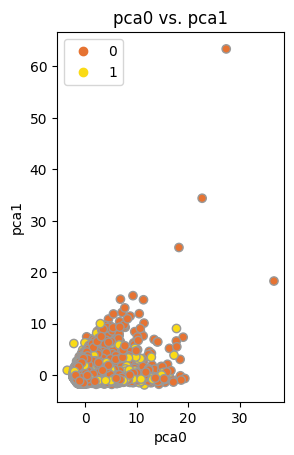

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots()

ax.set_aspect('equal')
scatter = ax.scatter(
    x = pca_dataset.iloc[:, 0],
    y = pca_dataset.iloc[:, 1],
    c = y_train,
    zorder = 2,
    edgecolors = '#999999',
    cmap = ListedColormap(['#E67332', '#FADB15'])
)

ax.set_title('pca0 vs. pca1')
ax.set_xlabel('pca0')
ax.set_ylabel('pca1')
ax.legend(
    handles = scatter.legend_elements()[0],
    labels = list(y_train.unique())
)

In [17]:
min_pca0 = min(pca_dataset.iloc[:, 0])
max_pca0 = max(pca_dataset.iloc[:, 0])
min_pca1 = min(pca_dataset.iloc[:, 1])
max_pca1 = max(pca_dataset.iloc[:, 1])

margin_pca0 = (max_pca0 - min_pca0) * 0.1
margin_pca1 = (max_pca1 - min_pca1) * 0.1

x = np.linspace(min_pca0 - margin_pca0, max_pca0 + margin_pca0, 100)
y = np.linspace(min_pca1 - margin_pca1, max_pca1 + margin_pca1, 100)

X, Y = np.meshgrid(x, y)

Z = model.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z,
            levels = 2,
            colors = ['#E3BCAB', '#B0D9CB', '#75B6E6'],
            zorder = 0
            )

ValueError: X has 2 features, but ColumnTransformer is expecting 23 features as input.